# Generate our second-order antiderivative matrix

In [2]:
def inverse_D2(dimension):
    """Multiply to our array of second derivative outputs and multiply h^2 to get our original function f(x).
    
    We know D2 is an nxn matrix whose diagonals are -2 and adjacent values are 1. We calculate the derivative via
    (D2)(y)/(h^2) = y'', so our antiderivative is y = (y'')(h^2)(D2^{-1}), meaning we need the inverse of D2."""
    import numpy as np
    
    # Generate a zero-matrix as our starting point
    matrix = np.zeros((dimension , dimension))
    
    
    
    
    # Run a loop to go through every value in the matrix
    for row in range(dimension):
        for column in range(dimension):
        
            # If the row and column have the same values, then we are at a diagonal
            if row - column == 0:
                matrix[row][column] = -2
        
            # If their difference is 1, then we are at a value touching the diagonal.
            elif abs(row - column) == 1:
                matrix[row][column] = 1
    
    
    
    
    # Return the inverse of the generated matrix
    return np.linalg.inv(matrix)

# Approximate the solution to a second-order DE
# We start with f(x)=x^2, f(0)=0, & f'(0)=2.

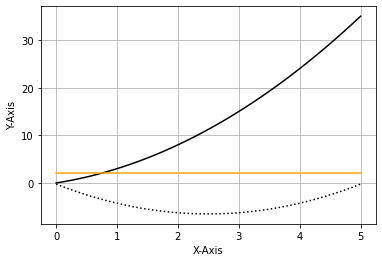

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define our initial function and our exact end goal function for comparison purposes
def func2(x):
    """Inputs an array of x-values and outputs an array of the second order derivative y-values."""
    num_vals = x.size
    return np.ones(num_vals) * 2

def exact_func(x):
    """Inputs an array of x-values and outputs an array of the exact y-values of the original function."""
    return x ** 2 + 2 * x




# Define our input x-values and other important variables
# Setting our min and max x-values
x_min = 0
x_max = 5

# Create our array of inputs by dividing it into n distinct subintervals
num_interv = 100
x_val = np.linspace(x_min, x_max, num_interv+1)

# Define our subinterval width
interv_width = (x_max-x_min) / num_interv




# Defining and plotting our exact outputs
exac_y_val = exact_func(x_val)
plt.plot(x_val, exac_y_val, color="black")

deriv2_val = func2(x_val)
plt.plot(x_val, deriv2_val, color="orange")




# Creating our antiderivative matrix and multiply it to our modified array of second derivative outputs
antid_matrix = inverse_D2(num_interv+1)

# Compute our estimated y-values using y(x) = D2^{-1}*y''(x)*h^2, then plot it
y_val = np.matmul(antid_matrix, deriv2_val) * (interv_width ** 2)
plt.plot(x_val, y_val, color="black", linestyle="dotted")




# Set up our cosmetic expectations for our plot and display the graph
plt.grid()
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

# Function to generate inverse D1

In [4]:
def inverse_D1(dimension):
    """Multiply to our array of first derivative outputs and multiply h to get our original function f(x).
    
    We know D1 is an nxn matrix whose diagonals are -1 and adjacent values are 1. We calculate the derivative via
    (D1)(y)/(h) = y', so our antiderivative is y = (y')(D1^{-1})(h), meaning we need the inverse of D1."""
    import numpy as np

    # Generate the 0 matrix as our starting point
    matrix = np.zeros((dimension,dimension))

    
    

    # Loop to cycle through every single value in the matrix
    for row in range(dimension):
        for column in range(dimension):
        
        # If the row and column have the same values, then we are at a diagonal
            if row - column == 0:
                matrix[row][column] = -1
        
        # If column value is 1 higher than row value, then we are at a value following the diagonal.
            elif column - row == 1:
                matrix[row][column] = 1

                
    
    
    # Return the inverse of the generated matrix
    return np.linalg.inv(matrix)

# Alternate method of finding 2nd-order antiderivative that goes down one derivative at a time

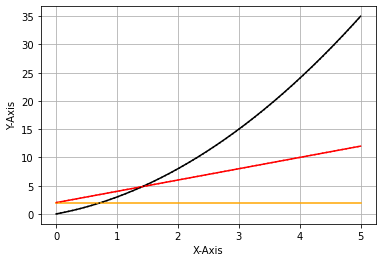

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define our initial function and our exact end goal function for comparison purposes
def func2(x):
    """Inputs an array of x-values and outputs an array of the second order derivative y-values."""
    num_vals = x.size
    return np.ones(num_vals) * 2

def exact_func1(x):
    """Inputs an array of x-values and outputs an array of the exact y-values of the derivative of
    the original function."""
    return 2 * x + 2

def exact_func(x):
    """Inputs an array of x-values and outputs an array of the exact y-values of the original function."""
    return x ** 2 + 2 * x




# Define our input x-values and other important variables
# Setting our min and max x-values
x_min = 0
x_max = 5

# Setting our initial values at y'(0) and y(0)
init_y = 0
init_yp = 2

# Create our array of inputs by dividing it into n distinct subintervals
num_interv = 500
x_val = np.linspace(x_min, x_max, num_interv+1)

# Define our subinterval width
interv_width = (x_max-x_min) / num_interv




# Defining and plotting our exact outputs
exac_y_val = exact_func(x_val)
plt.plot(x_val, exac_y_val, color="black")

exac_deriv1_val = exact_func1(x_val)
plt.plot(x_val, exac_deriv1_val, color="red")

deriv2_val = func2(x_val)
plt.plot(x_val, deriv2_val, color="orange")




# Creating our antiderivative matrix and multiply it to our modified array of second derivative outputs
antid_matrix = inverse_D1(num_interv+1)




# Compute our estimated y'(x)-values using y'(x) = D1^{-1}*y''(x)*h
estim_deriv1_val = np.matmul(antid_matrix, deriv2_val) * interv_width

#Adjust the height of the line to match our initial value at y'(0)
if estim_deriv1_val[0] != init_yp:
    
    # We set the different between our observed and expected y'(0) to diff, and add it to our observed y'(x)
    diff = init_yp - estim_deriv1_val[0]
    estim_deriv1_val += diff

# Plot our estimated y'(x)
plt.plot(x_val, estim_deriv1_val, color="red", linestyle="dotted")




# Compute our estimate y(x) values using y(x) = D1^{-1}*y'(x)*h
estim_y_val = np.matmul(antid_matrix, estim_deriv1_val) * interv_width

#Adjust the height of the line to match our initial value at y'(0)
if estim_y_val[0] != init_y:
    
    # We set the different between our observed and expected y'(0) to diff, and add it to our observed y'(x)
    diff = init_y - estim_y_val[0]
    estim_y_val += diff

# Plot our estimated y(x)
plt.plot(x_val, estim_y_val, color="black", linestyle="dotted")




# Set up our cosmetic expectations for our plot and display the graph
plt.grid()
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()